In [2]:
#Import packages
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
import pandas as pd
from matplotlib import patches
import requests
from datascience import *

# Impact of Covid-19 on Greenhouse Gas Emissions

### Goal: Identify and visualize the impact of COVID-19 on GHG emissions

Learning Objectives:

- According to GHG emissions data, when did COVID directly impacted emissions in the United States?
- Which sector was most effected by COVID-19? 

## Part One: Comparing Yearly Aggregated Data of Total GHG Emissions 

Question:
- Based on data about GHG emissions, can we determine what year the pandemic started?

In [3]:
#dataset of yearly GHG emissions across all countries
sectors_emissions = requests.get("https://api.climatetrace.org/emissions_by_sector_timeseries?interval=year&since=2000&to=2021").json()
sectors_emissions = pd.json_normalize(sectors_emissions, record_path = ["emissions"], meta = ["name"]).rename(columns ={"start": "Start Date", "end": "End Date", "value": "GHG Emissions", "name":"Sector"})
sectors_emissions = Table.from_df(sectors_emissions)
sectors_emissions.show(10)

Start Date,End Date,GHG Emissions,Sector
2021-01-01,2022-01-01,3.63696e+09,agriculture
2020-01-01,2021-01-01,3.09547e+11,agriculture
2019-01-01,2020-01-01,3.14606e+11,agriculture
2018-01-01,2019-01-01,3.09841e+11,agriculture
2017-01-01,2018-01-01,3.10349e+11,agriculture
2016-01-01,2017-01-01,3.04289e+11,agriculture
2015-01-01,2016-01-01,2.98767e+11,agriculture
2021-01-01,2022-01-01,2.18217e+09,buildings
2020-01-01,2021-01-01,1.85728e+11,buildings
2019-01-01,2020-01-01,1.88763e+11,buildings


In [4]:
#isolate the start date and GHG Emissions columns
start_and_ghg = sectors_emissions.select("Start Date", "GHG Emissions")
start_and_ghg

Start Date,GHG Emissions
2021-01-01,3.63696e+09
2020-01-01,3.09547e+11
2019-01-01,3.14606e+11
2018-01-01,3.09841e+11
2017-01-01,3.10349e+11
2016-01-01,3.04289e+11
2015-01-01,2.98767e+11
2021-01-01,2.18217e+09
2020-01-01,1.85728e+11
2019-01-01,1.88763e+11


In [5]:
#group the start date column, and get the sum of GHG Emissions in the next column
emissions_sum = start_and_ghg.group("Start Date", sum)
emissions_sum

Start Date,GHG Emissions sum
2015-01-01,2.27063e+12
2016-01-01,2.3126e+12
2017-01-01,2.35865e+12
2018-01-01,2.35479e+12
2019-01-01,2.391e+12
2020-01-01,2.35256e+12
2021-01-01,2.76409e+10


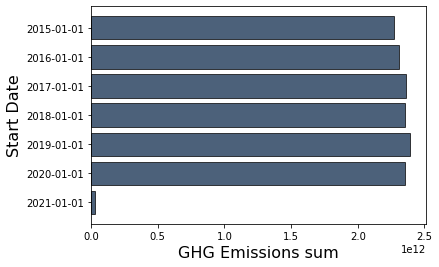

In [6]:
#create a bar chart showing the total GHG emissions for each year starting from 2015 to 2020
emissions_sum.barh("Start Date")

We expect 2020 to see a huge decrease in emissions due to worldwide lockdowns. According to the grapph above, it looks like 2020 had less overall emissions than 2019, but not by a huge difference. Why do you think this is? 

YOUR ANSWER HERE

Note: don't have full data for 2021, only a few months. Also, 2020 doesn't seem to be that much of a decrease. 

## Part Two: Monthly Data in 2020-2021 USA

Questions: 
- What month in 2020 showed the greatest decrease in GHG emissions? 
- What sector was the most impacted by the pandemic?


In [19]:
#monthly GHG Emissions data
usa_monthly = requests.get("https://api.climatetrace.org/emissions_by_sector_timeseries?country=USA&interval=month&since=2000&to=2021").json()
usa_monthly = pd.json_normalize(usa_monthly, record_path = ["emissions"], meta = ["name"]).rename(columns ={"start": "Start Date", "end": "End Date", "value": "GHG Emissions", "name":"Sector"})
usa_monthly = Table.from_df(usa_monthly)
usa_monthly.show(10)

Start Date,End Date,GHG Emissions,Sector
2021-12-01,2022-01-01,2.59478e+06,agriculture
2021-11-01,2021-12-01,2.59478e+06,agriculture
2021-10-01,2021-11-01,2.68128e+06,agriculture
2021-09-01,2021-10-01,2.59478e+06,agriculture
2021-08-01,2021-09-01,2.68128e+06,agriculture
2021-07-01,2021-08-01,2.68128e+06,agriculture
2021-06-01,2021-07-01,2.59478e+06,agriculture
2021-05-01,2021-06-01,2.68128e+06,agriculture
2021-04-01,2021-05-01,2.59478e+06,agriculture
2021-03-01,2021-04-01,2.68128e+06,agriculture


In [8]:
#isolate rows where the year is 2020
usa2020_to_2021 = usa_monthly.where("Start Date", are.containing('2020'))
usa2020_to_2021.show(5)

Start Date,End Date,GHG Emissions,Sector
2020-12-01,2021-01-01,2.88341e+09,agriculture
2020-11-01,2020-12-01,2.88341e+09,agriculture
2020-10-01,2020-11-01,2.97953e+09,agriculture
2020-09-01,2020-10-01,2.88341e+09,agriculture
2020-08-01,2020-09-01,2.97953e+09,agriculture


In [20]:
#drop the Sector and End Date Column
grouped_by_month = usa2020_to_2021.select("Start Date", "GHG Emissions")
grouped_by_month

Start Date,GHG Emissions
2020-12-01,2.88341e+09
2020-11-01,2.88341e+09
2020-10-01,2.97953e+09
2020-09-01,2.88341e+09
2020-08-01,2.97953e+09
2020-07-01,2.97953e+09
2020-06-01,2.88341e+09
2020-05-01,2.97953e+09
2020-04-01,2.88341e+09
2020-03-01,2.97953e+09


In [21]:
#group the start date column, get the total sum of GHG emissions in the next column
grouped_by_month.group("Start Date", sum).show(12)

Start Date,GHG Emissions sum
2020-01-01,2.26444e+10
2020-02-01,2.11835e+10
2020-03-01,2.26444e+10
2020-04-01,2.19139e+10
2020-05-01,2.26444e+10
2020-06-01,2.19139e+10
2020-07-01,2.26444e+10
2020-08-01,2.26444e+10
2020-09-01,2.19139e+10
2020-10-01,2.26444e+10


Let's look at each sector and determine which sector was most and least impacted by COVID. We'll compare data from 2019 and 2020 to see if any sectors took a hit in 2020.

In [11]:
# data from the year 2020 
usa2020_to_2021

Start Date,End Date,GHG Emissions,Sector
2020-12-01,2021-01-01,2.88341e+09,agriculture
2020-11-01,2020-12-01,2.88341e+09,agriculture
2020-10-01,2020-11-01,2.97953e+09,agriculture
2020-09-01,2020-10-01,2.88341e+09,agriculture
2020-08-01,2020-09-01,2.97953e+09,agriculture
2020-07-01,2020-08-01,2.97953e+09,agriculture
2020-06-01,2020-07-01,2.88341e+09,agriculture
2020-05-01,2020-06-01,2.97953e+09,agriculture
2020-04-01,2020-05-01,2.88341e+09,agriculture
2020-03-01,2020-04-01,2.97953e+09,agriculture


In [12]:
#return a new table containing only rows for the year 2019
usa2019_to_2020 = usa_monthly.where("Start Date", are.containing('2019'))
usa2019_to_2020.show(5)

Start Date,End Date,GHG Emissions,Sector
2019-12-01,2020-01-01,2.91446e+09,agriculture
2019-11-01,2019-12-01,2.91446e+09,agriculture
2019-10-01,2019-11-01,3.01161e+09,agriculture
2019-09-01,2019-10-01,2.91446e+09,agriculture
2019-08-01,2019-09-01,3.01161e+09,agriculture


In [13]:
# drop the start and end date columns and group the sector column
# the resulting table should have a column with each secotr and the corresponding total sum of GHG emissions 
# produced by that sector
sector_emissions20 = usa2020_to_2021.select("GHG Emissions", "Sector").group("Sector", sum)
sector_emissions20

Sector,GHG Emissions sum
agriculture,3.50815e+10
buildings,2.10489e+10
extraction,4.20978e+10
forests,2.80652e+10
manufacturing,4.20978e+10
maritime,7.01631e+09
oil and gas,2.10489e+10
power,1.40326e+10
transport,2.80652e+10
waste,2.80652e+10


In [14]:
sector_emissions19 = usa2019_to_2020.select("GHG Emissions", "Sector").group("Sector", sum)
sector_emissions19

Sector,GHG Emissions sum
agriculture,3.53622e+10
buildings,2.12173e+10
extraction,4.24346e+10
forests,2.82897e+10
manufacturing,4.24346e+10
maritime,7.07243e+09
oil and gas,2.12173e+10
power,1.41449e+10
transport,2.82897e+10
waste,2.82897e+10


table with 19 and 20 data, and difference column

In [22]:
#Create a table showing each sector and the corresponding total GHG emissions from 2019, 2020, 
# and the difference between the years.
sector_emissions19.relabel("GHG Emissions sum", "2019 Emissions")
emissions20 = sector_emissions20.column("GHG Emissions sum")

sector_emissions = sector_emissions19.with_column("2020 Emissions", emissions20)
difference = sector_emissions.column(1) - sector_emissions.column(2)
sector_emissions = sector_emissions.with_column("Difference", difference)
sector_emissions

Sector,2019 Emissions,2020 Emissions,Difference
agriculture,3.53622e+10,3.50815e+10,2.80627e+08
buildings,2.12173e+10,2.10489e+10,1.68376e+08
extraction,4.24346e+10,4.20978e+10,3.36752e+08
forests,2.82897e+10,2.80652e+10,2.24501e+08
manufacturing,4.24346e+10,4.20978e+10,3.36752e+08
maritime,7.07243e+09,7.01631e+09,5.61253e+07
oil and gas,2.12173e+10,2.10489e+10,1.68376e+08
power,1.41449e+10,1.40326e+10,1.12251e+08
transport,2.82897e+10,2.80652e+10,2.24501e+08
waste,2.82897e+10,2.80652e+10,2.24501e+08


The difference column is 2019 emissions minus 2020 emissions. All the differences are positive, which means there was an overall decrease in all sectors in GHG emissions from 2019 to 2020. Below, compute the greatest difference. This will be the sector that was impacted the most by COVID.

In [16]:
max(sector_emissions.column(3))

336751995.7840042

This number corresponds to the manufacturing and extration sectors. Thus, the manufacturing and extraction sectors had the greatest difference in total emissions from 2019 to 2020. This means that these two sectors were impacted by covid19 the most. 

## Part Three: Try it for yourself

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7078ea68-172b-49ac-b968-a8e564cba4aa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>